<a href="https://colab.research.google.com/github/Syed-Areeb-Wadood/Genrating-Handwritten-Digits-using-GAN/blob/master/Genrating_Handwrittten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from keras.datasets.mnist import load_data

In [16]:
(trainX , trainy) , (testX , testy) = load_data()

In [17]:
print(trainX.shape , trainy.shape)
print(testX.shape , testy.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


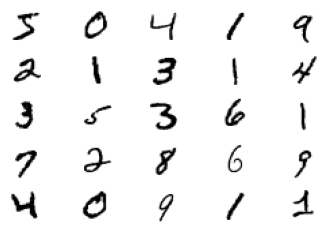

In [18]:
from matplotlib import pyplot 
for i in range(25):
  pyplot.subplot(5,5,1+i)
  pyplot.axis('off')
  pyplot.imshow(trainX[i] , cmap = 'gray_r')
pyplot.show()

In [19]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense , Conv2D , Flatten , Dropout , LeakyReLU 
def define_discriminator(in_shape = (28,28,1)):
  model = Sequential()
  model.add(Conv2D(64 , (3,3) , strides = (2,2) , padding = 'same' , input_shape = in_shape ))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64 , (3,3)  , strides = (2,2) , padding = 'same' ))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1  , activation = 'sigmoid'))
  opt = Adam(lr = 0.0002  , beta_1 = 0.5 )
  model.compile(loss = 'binary_crossentropy' , optimizer = opt , metrics =  ['accuracy'])
  return model

In [20]:
model =  define_discriminator()

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [22]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint


In [23]:
def load_real_samples():
  (trainX , _) , (_ , _ ) = load_data()
  X = expand_dims(trainX , axis = -1)
  X = X.astype('float32')
  X = X / 255.0
  return X

In [24]:
def generate_real_samples(dataset , n_samples):
  ix = randint( 0 , dataset.shape[0] , n_samples)
  X = dataset[ix]
  y = ones((n_samples , 1))
  return X , y

In [25]:
def generate_fake_samples(n_samples):
  X = rand(28*28*n_samples)
  X = X.reshape((n_samples ,28,28,1))
  y = zeros((n_samples , 1))
  return X , y

In [26]:
def train_discriminator(model , dataset , n_iter = 100 , n_batch = 256):
  half_batch = int(n_batch/2)
  for i in range(n_iter):
    X_real , y_real = generate_real_samples( dataset , half_batch )
    _ ,real_acc = model.train_on_batch(X_real ,y_real)
    X_fake , y_fake = generate_fake_samples( half_batch )
    _ , fake_acc  = model.train_on_batch(X_fake , y_fake)
    print('> %d real=%.0f% % fake=%.0f% % ' % (i+1, real_acc*100, fake_acc*100))
model  = define_discriminator()
dataset = load_real_samples()
train_discriminator(model , dataset)

> 1 real=38% fake=40% 
> 2 real=44% fake=54% 
> 3 real=54% fake=62% 
> 4 real=45% fake=82% 
> 5 real=53% fake=93% 
> 6 real=43% fake=97% 
> 7 real=55% fake=99% 
> 8 real=50% fake=100% 
> 9 real=60% fake=100% 
> 10 real=65% fake=100% 
> 11 real=52% fake=100% 
> 12 real=61% fake=100% 
> 13 real=57% fake=100% 
> 14 real=64% fake=100% 
> 15 real=66% fake=100% 
> 16 real=67% fake=100% 
> 17 real=60% fake=100% 
> 18 real=70% fake=100% 
> 19 real=78% fake=100% 
> 20 real=82% fake=100% 
> 21 real=85% fake=100% 
> 22 real=84% fake=100% 
> 23 real=85% fake=100% 
> 24 real=87% fake=100% 
> 25 real=91% fake=100% 
> 26 real=95% fake=100% 
> 27 real=93% fake=100% 
> 28 real=90% fake=100% 
> 29 real=98% fake=100% 
> 30 real=100% fake=100% 
> 31 real=98% fake=100% 
> 32 real=97% fake=100% 
> 33 real=100% fake=100% 
> 34 real=99% fake=100% 
> 35 real=99% fake=100% 
> 36 real=100% fake=100% 
> 37 real=100% fake=100% 
> 38 real=100% fake=100% 
> 39 real=100% fake=100% 
> 40 real=100% fake=100% 
> 41 real

In [27]:
from keras.layers import Conv2D , Conv2DTranspose , Reshape
def define_generator(latent_dim):
  model = Sequential()
  n_nodes  = 128*7*7
  model.add(Dense(n_nodes , input_dim = latent_dim))
  model.add( LeakyReLU(alpha = 0.2) )
  model.add(Reshape((7, 7, 128)))
  model.add( Conv2DTranspose( 128 ,  (4,4) , strides = (2,2) , padding = 'same') )
  model.add( LeakyReLU(0.2) )
  model.add( Conv2DTranspose( 128 , (4,4) , strides  = (2,2)  , padding = 'same' ) )
  model.add( LeakyReLU(0.2) )
  model.add(Conv2D(1 , (7,7)  , activation = 'sigmoid' , padding = 'same'))
  return model
latent_dim = 100 #50,100,500
model  = define_generator(latent_dim)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 28, 28, 128)      

In [43]:
from numpy.random import randn
def generate_latent_points(latent_dim,n_samples):
  x_input = randn(n_samples,latent_dim)
  #for x in x_input:
  #  if(x > 25):
  #    print(x , end = '')
  #x_input = x_input.reshape(n_samples,latent_dim)
  return x_input

In [44]:
generate_latent_points(100,25)

array([[-0.57647555,  0.73789717, -0.69899475, ..., -0.99969913,
         1.28881917, -0.58852551],
       [-0.11105802, -0.9553811 , -0.48957779, ...,  1.25699401,
         0.22240067,  0.08669871],
       [ 1.68913778, -0.19556899, -1.76265177, ...,  0.76283578,
         1.1669099 ,  1.25482007],
       ...,
       [ 0.49226733,  1.05469218, -0.82099012, ...,  0.33518414,
        -0.37606784, -1.55645346],
       [-1.01650228,  0.33438203,  0.11623539, ...,  0.49302597,
         0.89717056,  0.07031163],
       [ 1.03959564,  1.10650109, -0.07553071, ..., -0.4405098 ,
         0.59210907, -1.95539456]])

In [45]:
def generate_fake_samples( g_model , latent_dim , n_samples ):
  x_input = generate_latent_points(latent_dim , n_samples)
  X = g_model.predict(x_input)
  y = zeros((n_samples , 1))
  return X , y

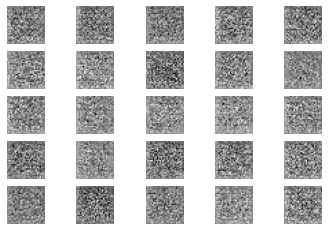

In [46]:
latent_dim = 100
n_samples = 25
model = define_generator(latent_dim)
X , y = generate_fake_samples(model , latent_dim, n_samples)
#print(type(X))
for i in range(n_samples):
  pyplot.subplot(5,5,1+i)
  pyplot.axis('off')
  pyplot.imshow(X[i, :, :, 0] , cmap = 'gray_r') 
pyplot.show()

In [47]:
def define_gan(g_model,d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  optimiser = Adam(lr= 0.0002 , beta_1 = 0.5)
  model.compile(optimizer=optimiser ,loss='binary_crossentropy')
  return model

In [48]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model  = define_gan(g_model , d_model)
gan_model.summary()



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_19 (Sequential)   (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


In [50]:
def trian_gan(gan_model , latent_dim , n_epochs = 100 , n_batches  = 256):
  for i in range(n_epochs):
    xgan = generate_latent_points(latent_dim,n_batches)
    ygan = ones((n_batches,1))
    gan_model.train_on_batch(xgan,ygan)

In [51]:
def train(g_model , d_model , gan_model ,latent_dim , n_epochs = 100 , n_batch = 256):
  bat_per_epo = int(dataset[0].shape / n_batch)
  half_batch = int(n_batch/2)
  for i in range(n_epoch):
    for j in range(bat_per_epo):
      X_real , y_real = generate_real_samples(dataset , half_batch)
      X_fake , y_fake = generate_fake_samples(g_model , latent_dim , half_batch)
      X , y = vstack((X_real , X_fake)) , vstack((y_real , y_fake))
      d_loss = d_model.train_on_batch(X,y) 
      xgan = generate_latent_points(latent_dim , n_batch)
      ygan = ones((n_batch,1))
      g_loss = g_model.train_on_batch(xgan , ygan)
      print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

In [53]:
def summarize_performance(epoch ,g_model ,d_model, dataset , latent_dim , n_samples = 100):
  X_real , y_real = generate_real_samples(dataset , n_samples)
  x_fake , y_fake  = generate_fake_samples(g_model , latent_dim , n_samples)
  _ ,accuracy_real = d_model.evaluate(X_real , y_real  , verbose = 0)
  _ ,accuracy_false = d_model.evaluate( x_fake, y_fake , verbose = 0 )
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (accuracy_real*100, accuracy_fake*100))